# Paths
This is an attempt to calculate paths, in order to get distributions of those paths. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import psycopg2

In [2]:
import sys
sys.path.append('../../src/')
from utils.database import dbutils

conn = dbutils.connect()
cursor = conn.cursor()

In [3]:
df = pd.read_sql('''
select cust_id, 
    (cust_id - lag(cust_id) over ())=0 as same_cust, 
    date_, 
    extract(days from date_ - lag(date_) over ()) - 1 as datediff,
    calls, 
    calls_in_florence_city as calls_in_fl_city,
    calls_near_airport
from optourism.foreigners_timeseries_daily;
''', con=conn)

# df = pd.read_sql('''
# select cust_id, 
#     (cust_id - lag(cust_id) over ())=0 as same_cust, 
#     date_, 
#     extract(days from date_ - lag(date_) over ()) - 1 as datediff,
#     calls, 
#     in_florence as calls_in_fl_prov, 
#     in_florence_comune as calls_in_fl_city, 
#     in_florence>0 as now_in_fl_prov, 
#     (case when (cust_id - lag(cust_id) over ())=0 then (lag(in_florence) over ())>0 else Null end) as was_in_fl_prov,
#     in_florence_comune>0 as now_in_fl_city, 
#     (case when (cust_id - lag(cust_id) over ())=0 then (lag(in_florence_comune) over ())>0 else Null end) as was_in_fl_city
# from optourism.foreigners_timeseries_daily;
# ''', con=conn)

In [45]:
dfi = pd.read_sql('''
select cust_id, 
    (cust_id - lag(cust_id) over ())=0 as same_cust, 
    date_, 
    extract(days from date_ - lag(date_) over ()) - 1 as datediff,
    calls, 
    calls_in_florence_city as calls_in_fl_city,
    calls_near_airport
from optourism.italians_timeseries_daily;
''', con=conn)

In [4]:
df.head(10) # Check

,cust_id,same_cust,date_,datediff,calls,calls_in_fl_city,calls_near_airport
0,123,None,2016-07-28,NaN,3,3,0
1,123,True,2016-07-29,0.0,33,33,0
2,123,True,2016-07-30,0.0,4,4,0
3,123,True,2016-07-31,0.0,24,11,0
4,123,True,2016-08-01,0.0,52,0,0
5,123,True,2016-08-02,0.0,41,6,0
6,158,False,2016-06-05,-59.0,18,0,0
7,158,True,2016-07-03,27.0,12,0,0
8,158,True,2016-07-04,0.0,41,1,0
9,158,True,2016-07-05,0.0,13,0,0


In [5]:
# df.iloc[0,] # How to locate an individual element

In [6]:
df.iloc[0,1] = False # Replace the 'None' with 'False'
df.head(20) # Check

,cust_id,same_cust,date_,datediff,calls,calls_in_fl_city,calls_near_airport
0,123,False,2016-07-28,NaN,3,3,0
1,123,True,2016-07-29,0.0,33,33,0
2,123,True,2016-07-30,0.0,4,4,0
3,123,True,2016-07-31,0.0,24,11,0
4,123,True,2016-08-01,0.0,52,0,0
5,123,True,2016-08-02,0.0,41,6,0
6,158,False,2016-06-05,-59.0,18,0,0
7,158,True,2016-07-03,27.0,12,0,0
8,158,True,2016-07-04,0.0,41,1,0
9,158,True,2016-07-05,0.0,13,0,0


In [7]:
df.loc[df['same_cust']==False,'datediff'] = None # Comes out as NaN
df.head(10)

,cust_id,same_cust,date_,datediff,calls,calls_in_fl_city,calls_near_airport
0,123,False,2016-07-28,NaN,3,3,0
1,123,True,2016-07-29,0.0,33,33,0
2,123,True,2016-07-30,0.0,4,4,0
3,123,True,2016-07-31,0.0,24,11,0
4,123,True,2016-08-01,0.0,52,0,0
5,123,True,2016-08-02,0.0,41,6,0
6,158,False,2016-06-05,NaN,18,0,0
7,158,True,2016-07-03,27.0,12,0,0
8,158,True,2016-07-04,0.0,41,1,0
9,158,True,2016-07-05,0.0,13,0,0


In [47]:
dfi.loc[dfi['same_cust']==False,'datediff'] = None # Comes out as NaN

In [8]:
df['calls_out_fl_city'] = df['calls'] - df['calls_in_fl_city']
df['in_fl_city'] = df['calls_in_fl_city']>0
df['out_fl_city'] = df['calls_out_fl_city']>0

In [9]:
df['was_in_fl_city'] = df['in_fl_city'].shift(1)
df['was_out_fl_city'] = df['out_fl_city'].shift(1)
df['willbe_in_fl_city'] = df['in_fl_city'].shift(-1)
df['willbe_out_fl_city'] = df['out_fl_city'].shift(-1)

In [10]:
df.loc[df['same_cust']==False,'was_in_fl_city'] = None
df.loc[df['same_cust']==False,'was_out_fl_city'] = None

In [11]:
df['trip'] = ''
df.head()

,cust_id,same_cust,date_,datediff,calls,calls_in_fl_city,calls_near_airport,calls_out_fl_city,in_fl_city,out_fl_city,was_in_fl_city,was_out_fl_city,willbe_in_fl_city,willbe_out_fl_city,trip
0,123,False,2016-07-28,NaN,3,3,0,0,True,False,None,None,True,False,
1,123,True,2016-07-29,0.0,33,33,0,0,True,False,True,False,True,False,
2,123,True,2016-07-30,0.0,4,4,0,0,True,False,True,False,True,True,
3,123,True,2016-07-31,0.0,24,11,0,13,True,True,True,False,False,True,
4,123,True,2016-08-01,0.0,52,0,0,52,False,True,True,True,True,True,


In [12]:
# df['same_cust'][0]

In [13]:
df.loc[(df['same_cust']==True)&(df['datediff']<3)&(df['was_in_fl_city']==False)&(df['in_fl_city']==True),'trip'] = 'start'
df.loc[(df['same_cust']==True)&(df['datediff']<3)&(df['was_in_fl_city']==True)&(df['in_fl_city']==True),'trip'] = 'continue'
df.loc[(df['same_cust']==True)&(df['datediff']<3)&(df['was_in_fl_city']==True)&(df['in_fl_city']==True)&(df['willbe_in_fl_city']==False),'trip'] = 'end'
df.loc[(df['same_cust']==False)&((df['in_fl_city']==True)|(df['calls_near_airport']>0)),'trip'] = 'first'

In [14]:
df.loc[(df['same_cust']==True)&(df['same_cust'].shift(-1)==False)&((df['in_fl_city']==True)|(df['calls_near_airport']>0)),'trip'] = 'last'

In [15]:
df['on_trip'] = df['trip']!=''

In [16]:
df2 = df[['cust_id','same_cust','date_','datediff','calls_in_fl_city','calls_out_fl_city','trip','on_trip']]
df2.head()

,cust_id,same_cust,date_,datediff,calls_in_fl_city,calls_out_fl_city,trip,on_trip
0,123,False,2016-07-28,NaN,3,0,first,True
1,123,True,2016-07-29,0.0,33,0,continue,True
2,123,True,2016-07-30,0.0,4,0,continue,True
3,123,True,2016-07-31,0.0,11,13,end,True
4,123,True,2016-08-01,0.0,0,52,,False


In [17]:
df2['trip_id'] = (((df2['on_trip'].shift(1) != df2['on_trip']).astype(int).cumsum())*(df2['on_trip']).astype(int))

In [18]:
df2.loc[0:50]

,cust_id,same_cust,date_,datediff,calls_in_fl_city,calls_out_fl_city,trip,on_trip,trip_id
0,123,False,2016-07-28,NaN,3,0,first,True,1
1,123,True,2016-07-29,0.0,33,0,continue,True,1
2,123,True,2016-07-30,0.0,4,0,continue,True,1
3,123,True,2016-07-31,0.0,11,13,end,True,1
4,123,True,2016-08-01,0.0,0,52,,False,0
5,123,True,2016-08-02,0.0,6,35,last,True,3
6,158,False,2016-06-05,NaN,0,18,,False,0
7,158,True,2016-07-03,27.0,0,12,,False,0
8,158,True,2016-07-04,0.0,1,40,start,True,5
9,158,True,2016-07-05,0.0,0,13,,False,0


In [19]:
dfg = df2[df2['trip_id']!=0][['cust_id','trip_id']].groupby(['cust_id','trip_id']).size().to_frame()

In [20]:
dfg.head(20)

0
cust_id trip_id   
123     1        4
        3        1
158     5        1
193     7        1
394     9        2
756     11       3
864     13       1
866     15       1
1179    17       1
1204    19       1
1610    21       2
        23       1
        25       1
        27       2
1626    29       2
1697    31       1
1760    33       1
1876    33       1
2021    35       3
2070    37       1

In [21]:
dfg.groupby('cust_id').std().head()

,0
cust_id,
123,2.12132
158,NaN
193,NaN
394,NaN
756,NaN


In [22]:
def frequency(dataframe,columnname):
    out = dataframe[columnname].value_counts().to_frame()
    out.columns = ['frequency']
    out.index.name = columnname
    out.reset_index(inplace=True)
    out = out.sort_values(columnname)
    out['cumulative'] = out['frequency'].cumsum()/out['frequency'].sum()
    out['ccdf'] = 1 - out['cumulative']
    return out

In [23]:
fr_trips = frequency(dfg.groupby('cust_id').count(),0) # Distribution of lengths of gaps between trips

In [39]:
fr_trlen = frequency(dfg,0) # Distribution of lengths of gaps between trips

In [40]:
fr_dtdff = frequency(df[df['datediff']>0],'datediff') # Distribution of lengths of gaps between trips

In [42]:
fr_dtdff.head()

,datediff,frequency,cumulative,ccdf
0,1.0,334539,0.644261,0.355739
1,2.0,105624,0.847674,0.152326
2,3.0,14353,0.875315,0.124685
3,4.0,8524,0.891731,0.108269
4,5.0,5745,0.902794,0.097206


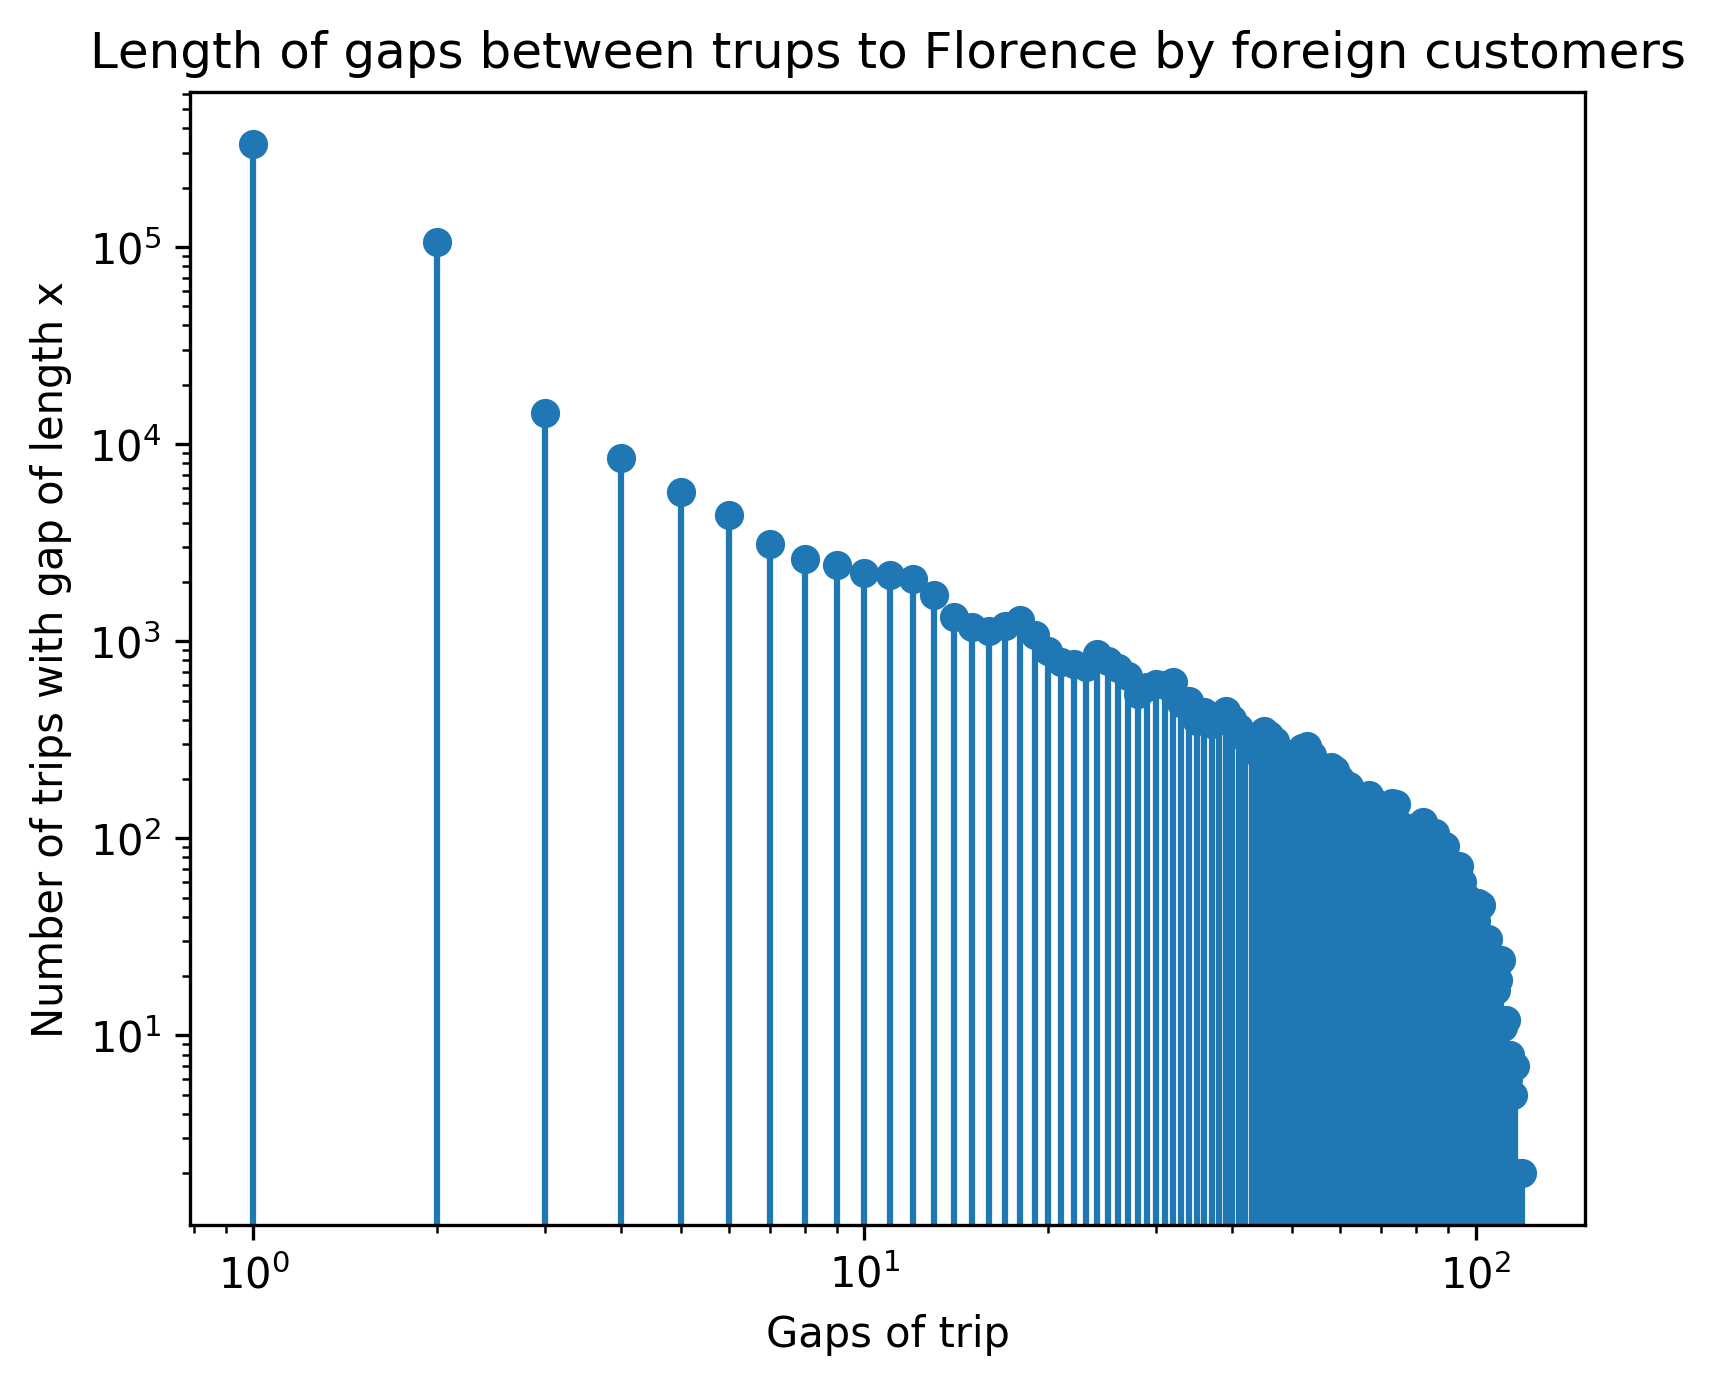

In [44]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(fr_dtdff['datediff'],fr_dtdff['frequency'], linestyle='steps--')
plt.yscale('log')
plt.xscale('log')
ax.set_title('Length of gaps between trups to Florence by foreign customers')
ax.set_ylabel('Number of trips with gap of length x')
ax.set_xlabel('Gaps of trip')
plt.show()

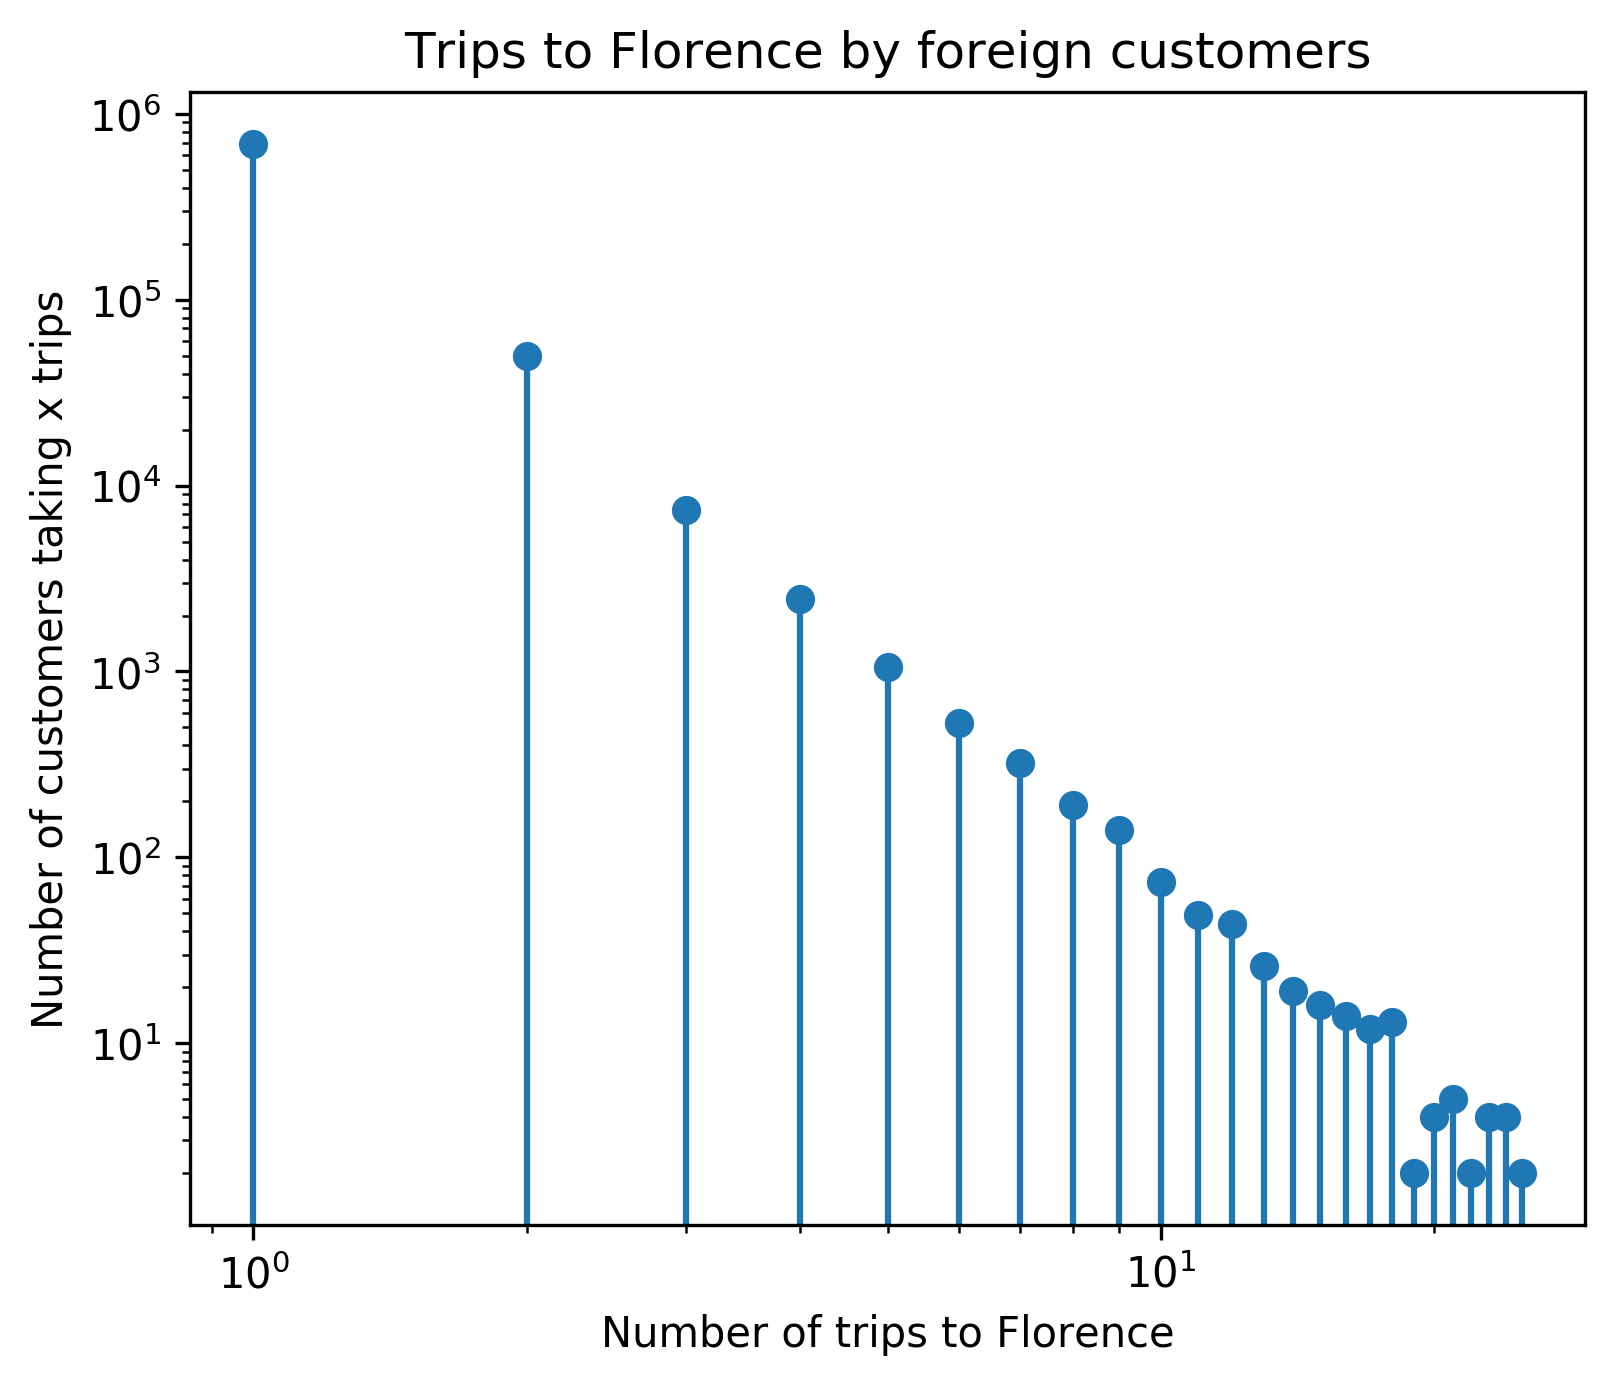

In [25]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(fr_trips[0],fr_trips['frequency'], linestyle='steps--')
plt.yscale('log')
plt.xscale('log')
ax.set_title('Trips to Florence by foreign customers')
ax.set_ylabel('Number of customers taking x trips')
ax.set_xlabel('Number of trips to Florence')
plt.show()

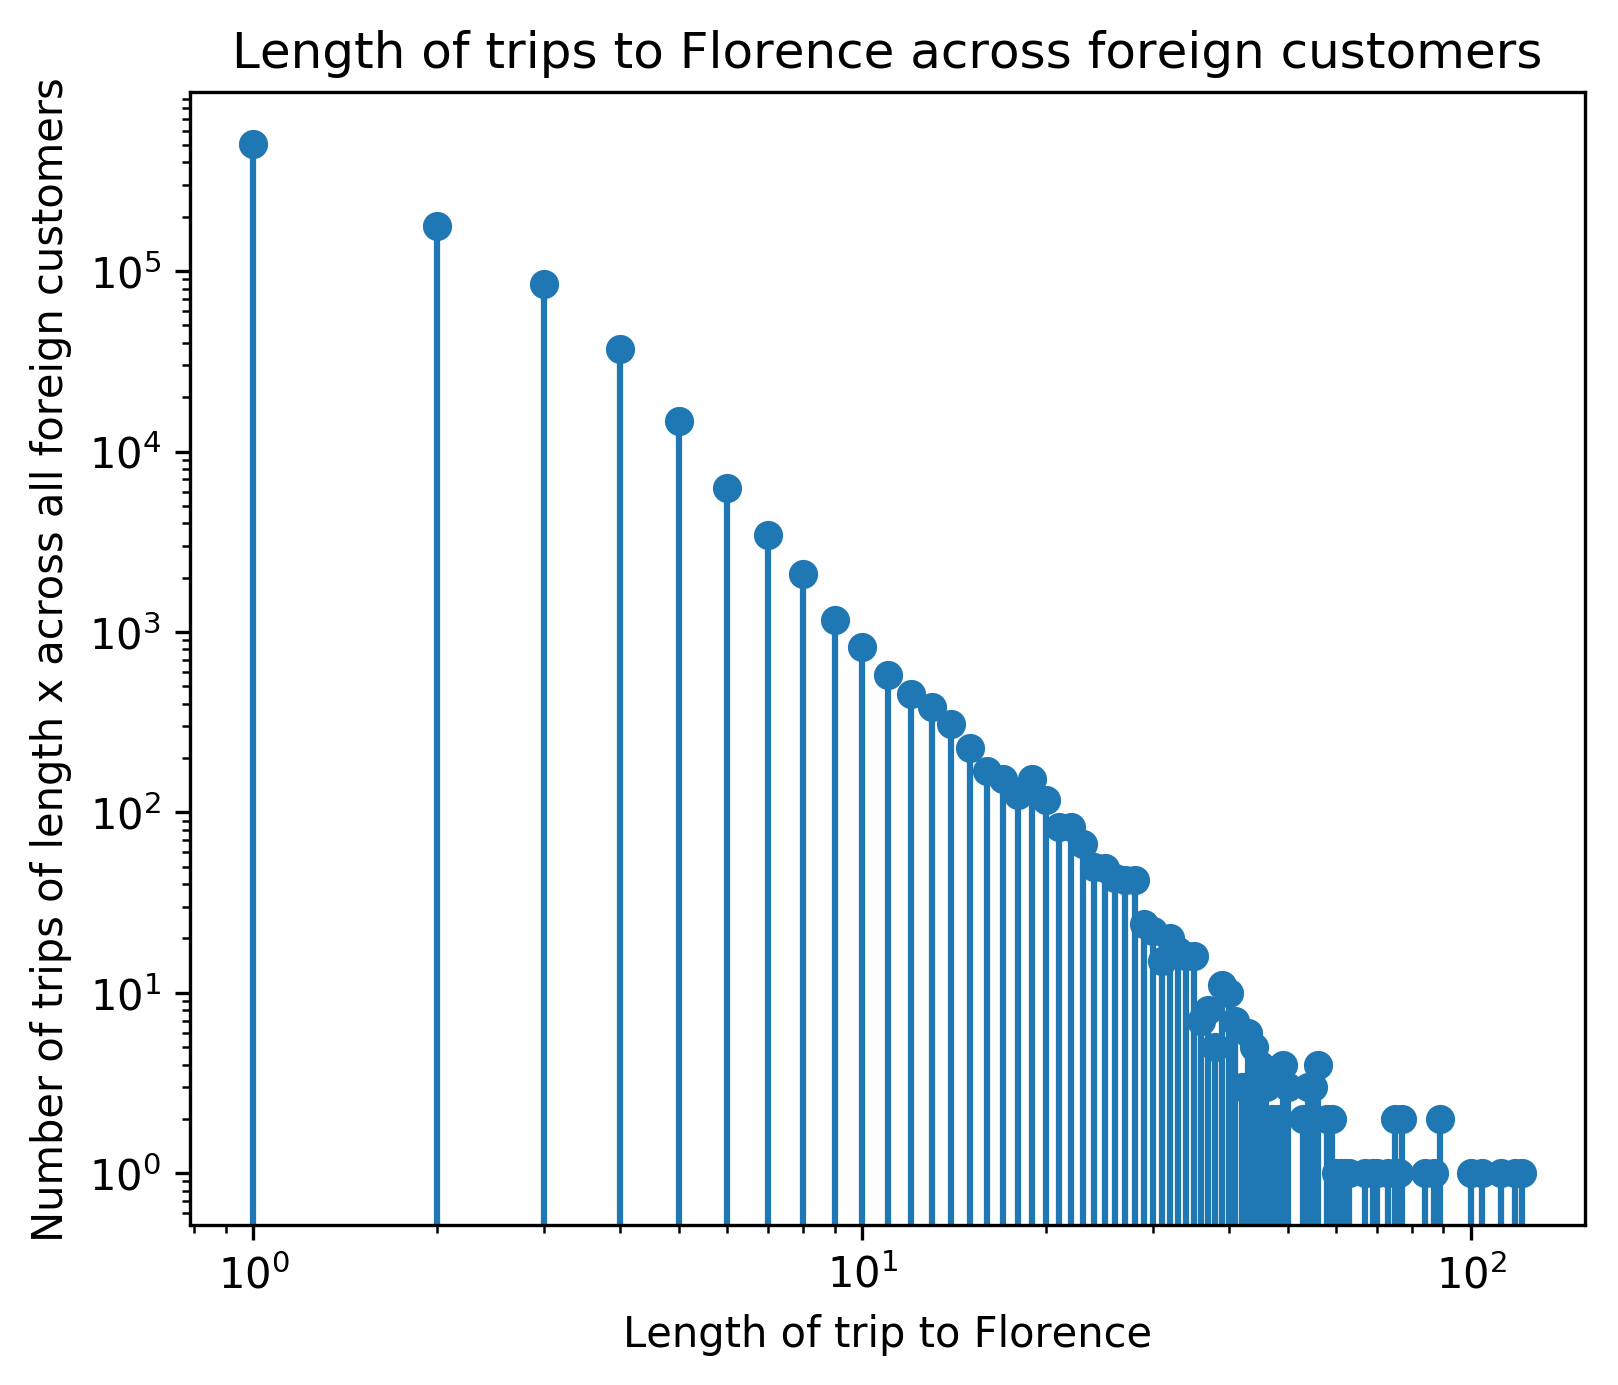

In [26]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(fr_trlen[0],fr_trlen['frequency'], linestyle='steps--')
plt.yscale('log')
plt.xscale('log')
ax.set_title('Length of trips to Florence across foreign customers')
ax.set_ylabel('Number of trips of length x across all foreign customers')
ax.set_xlabel('Length of trip to Florence')
plt.show()

In [27]:
dfg[dfg.groupby('cust_id').count()==1].head(20)

0
cust_id trip_id     
123     1        NaN
        3        NaN
158     5        1.0
193     7        1.0
394     9        2.0
756     11       3.0
864     13       1.0
866     15       1.0
1179    17       1.0
1204    19       1.0
1610    21       NaN
        23       NaN
        25       NaN
        27       NaN
1626    29       2.0
1697    31       1.0
1760    33       1.0
1876    33       1.0
2021    35       3.0
2070    37       1.0

In [28]:
fr_len1trip = frequency(dfg[dfg.groupby('cust_id').count()==1],0) # Distribution of lengths of gaps between trips

In [29]:
fr_len1trip.head(20)

,0,frequency,cumulative,ccdf
0,1.0,412900,0.597772,0.402228
1,2.0,151221,0.816700,0.183300
2,3.0,73434,0.923014,0.076986
3,4.0,31173,0.968144,0.031856
4,5.0,11741,0.985142,0.014858
5,6.0,4587,0.991783,0.008217
6,7.0,2350,0.995185,0.004815
7,8.0,1289,0.997051,0.002949
8,9.0,521,0.997805,0.002195
9,10.0,323,0.998273,0.001727


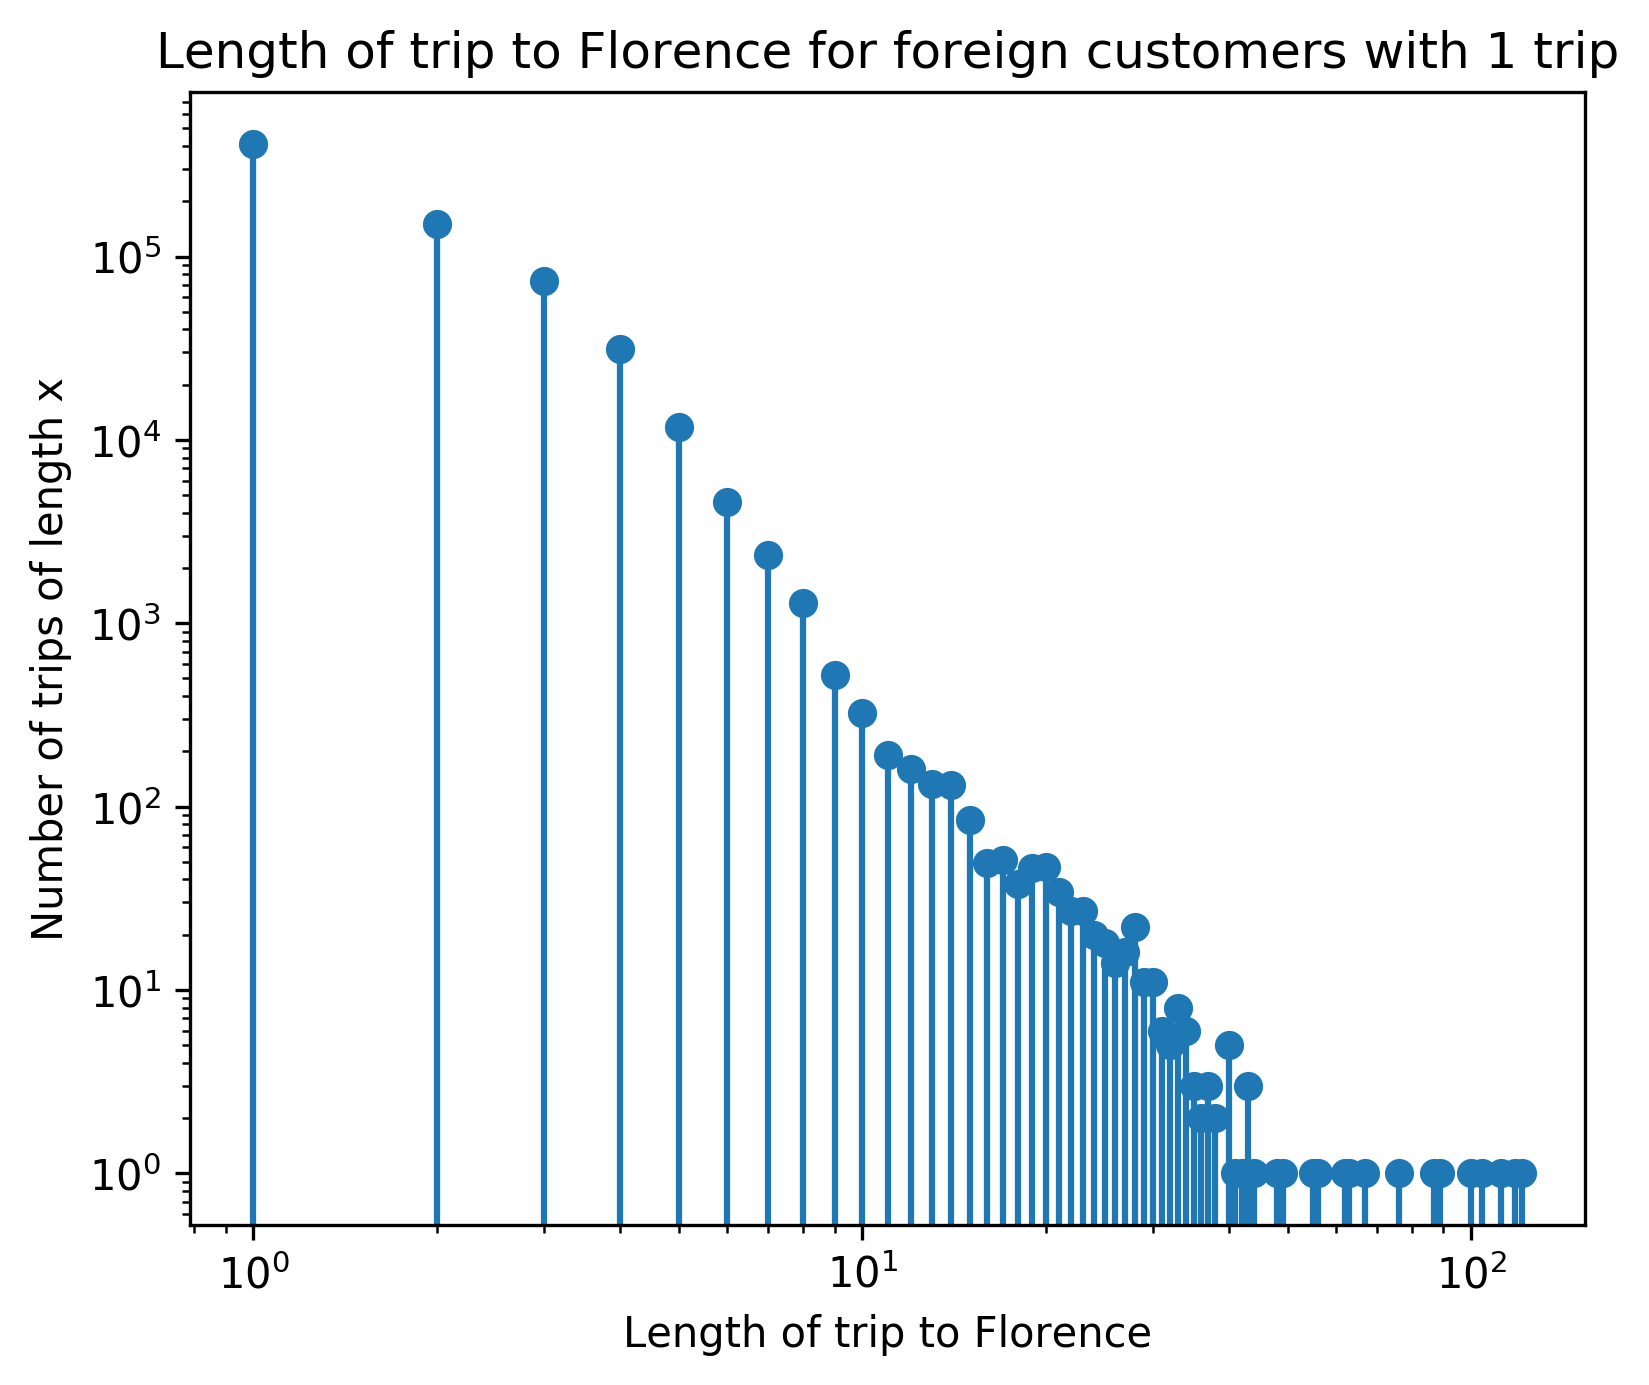

In [30]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(fr_len1trip[0],fr_len1trip['frequency'], linestyle='steps--')
plt.yscale('log')
plt.xscale('log')
ax.set_title('Length of trip to Florence for foreign customers with 1 trip')
ax.set_ylabel('Number of trips of length x')
ax.set_xlabel('Length of trip to Florence')
plt.show()

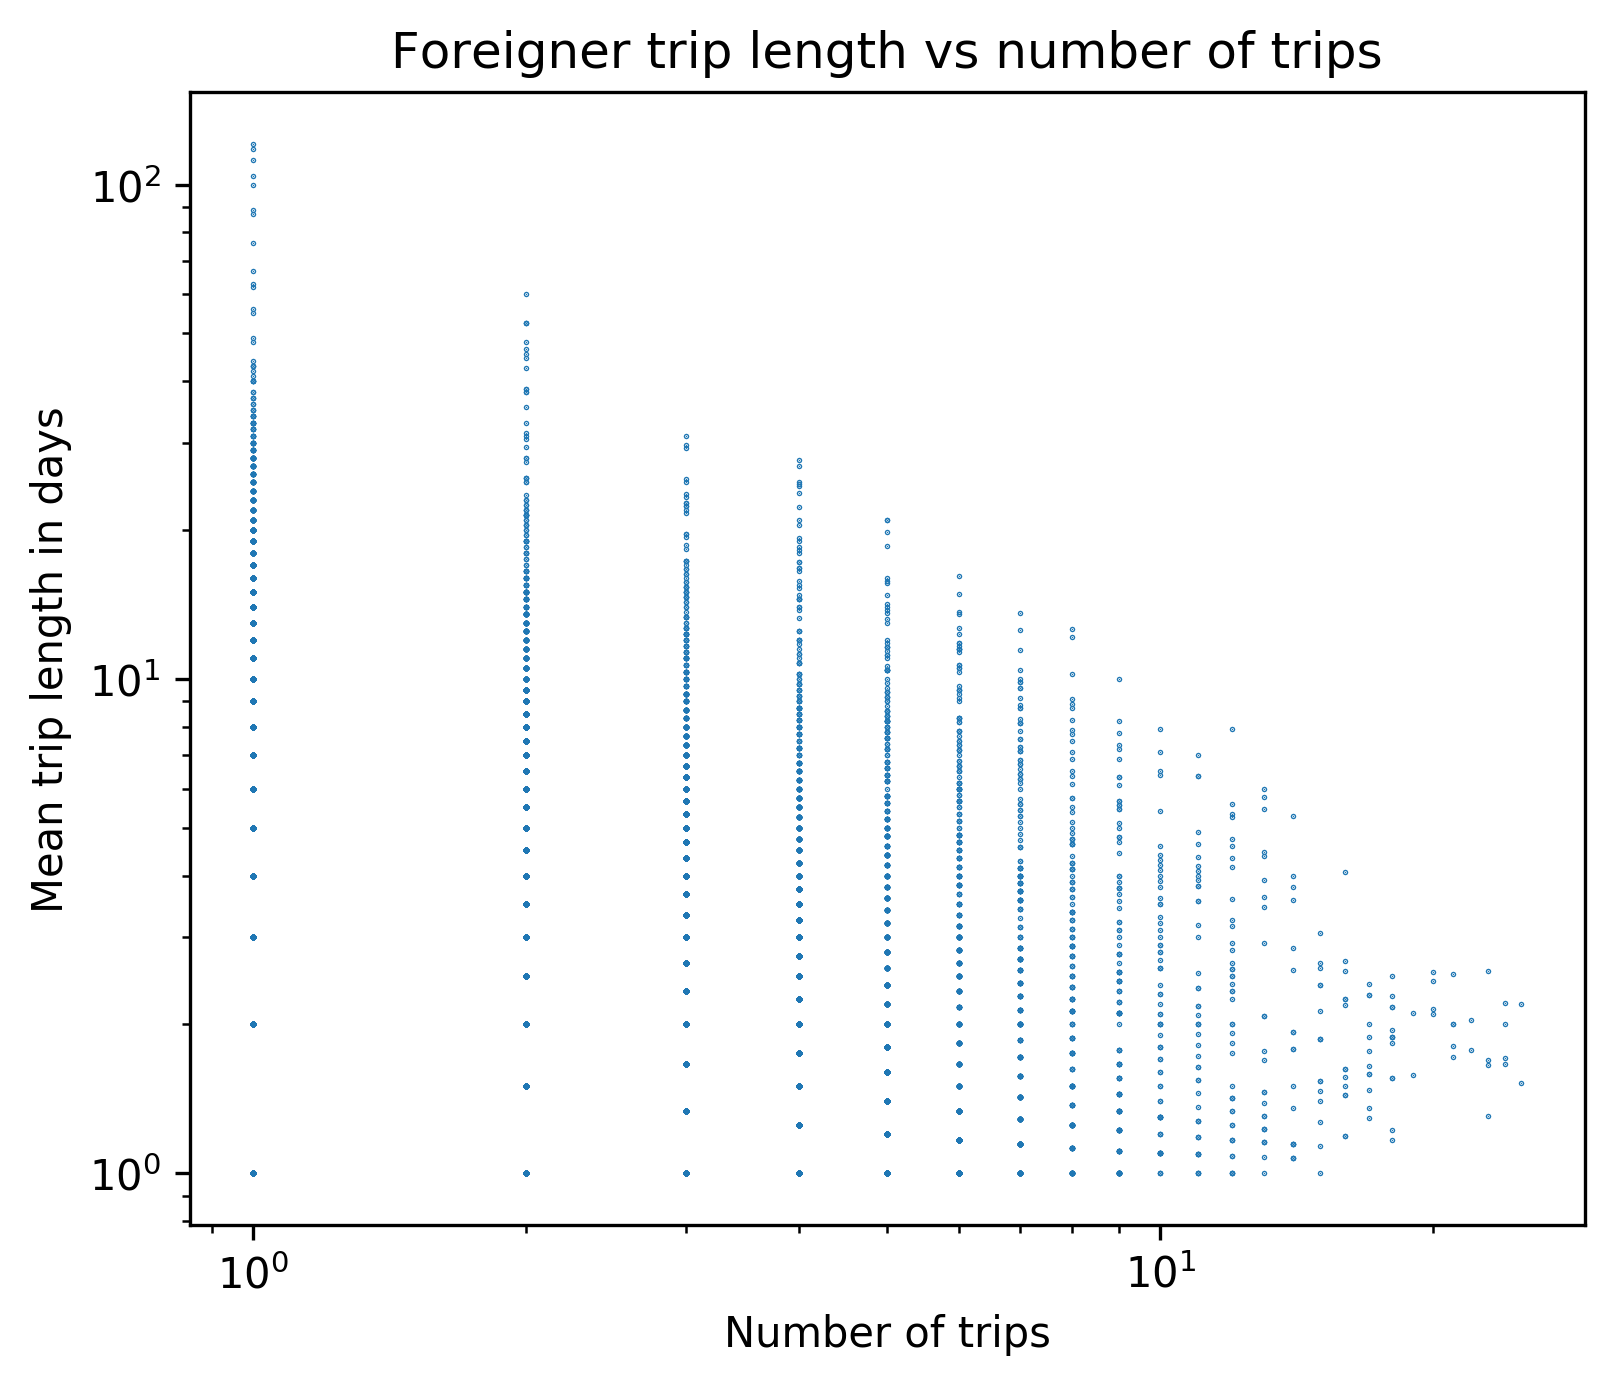

In [31]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfg.groupby('cust_id').count(),y=dfg.groupby('cust_id').mean(),s=.1)
plt.yscale('log')
plt.xscale('log')
ax.set_title('Foreigner trip length vs number of trips')
ax.set_xlabel('Number of trips')
ax.set_ylabel('Mean trip length in days')
plt.show()

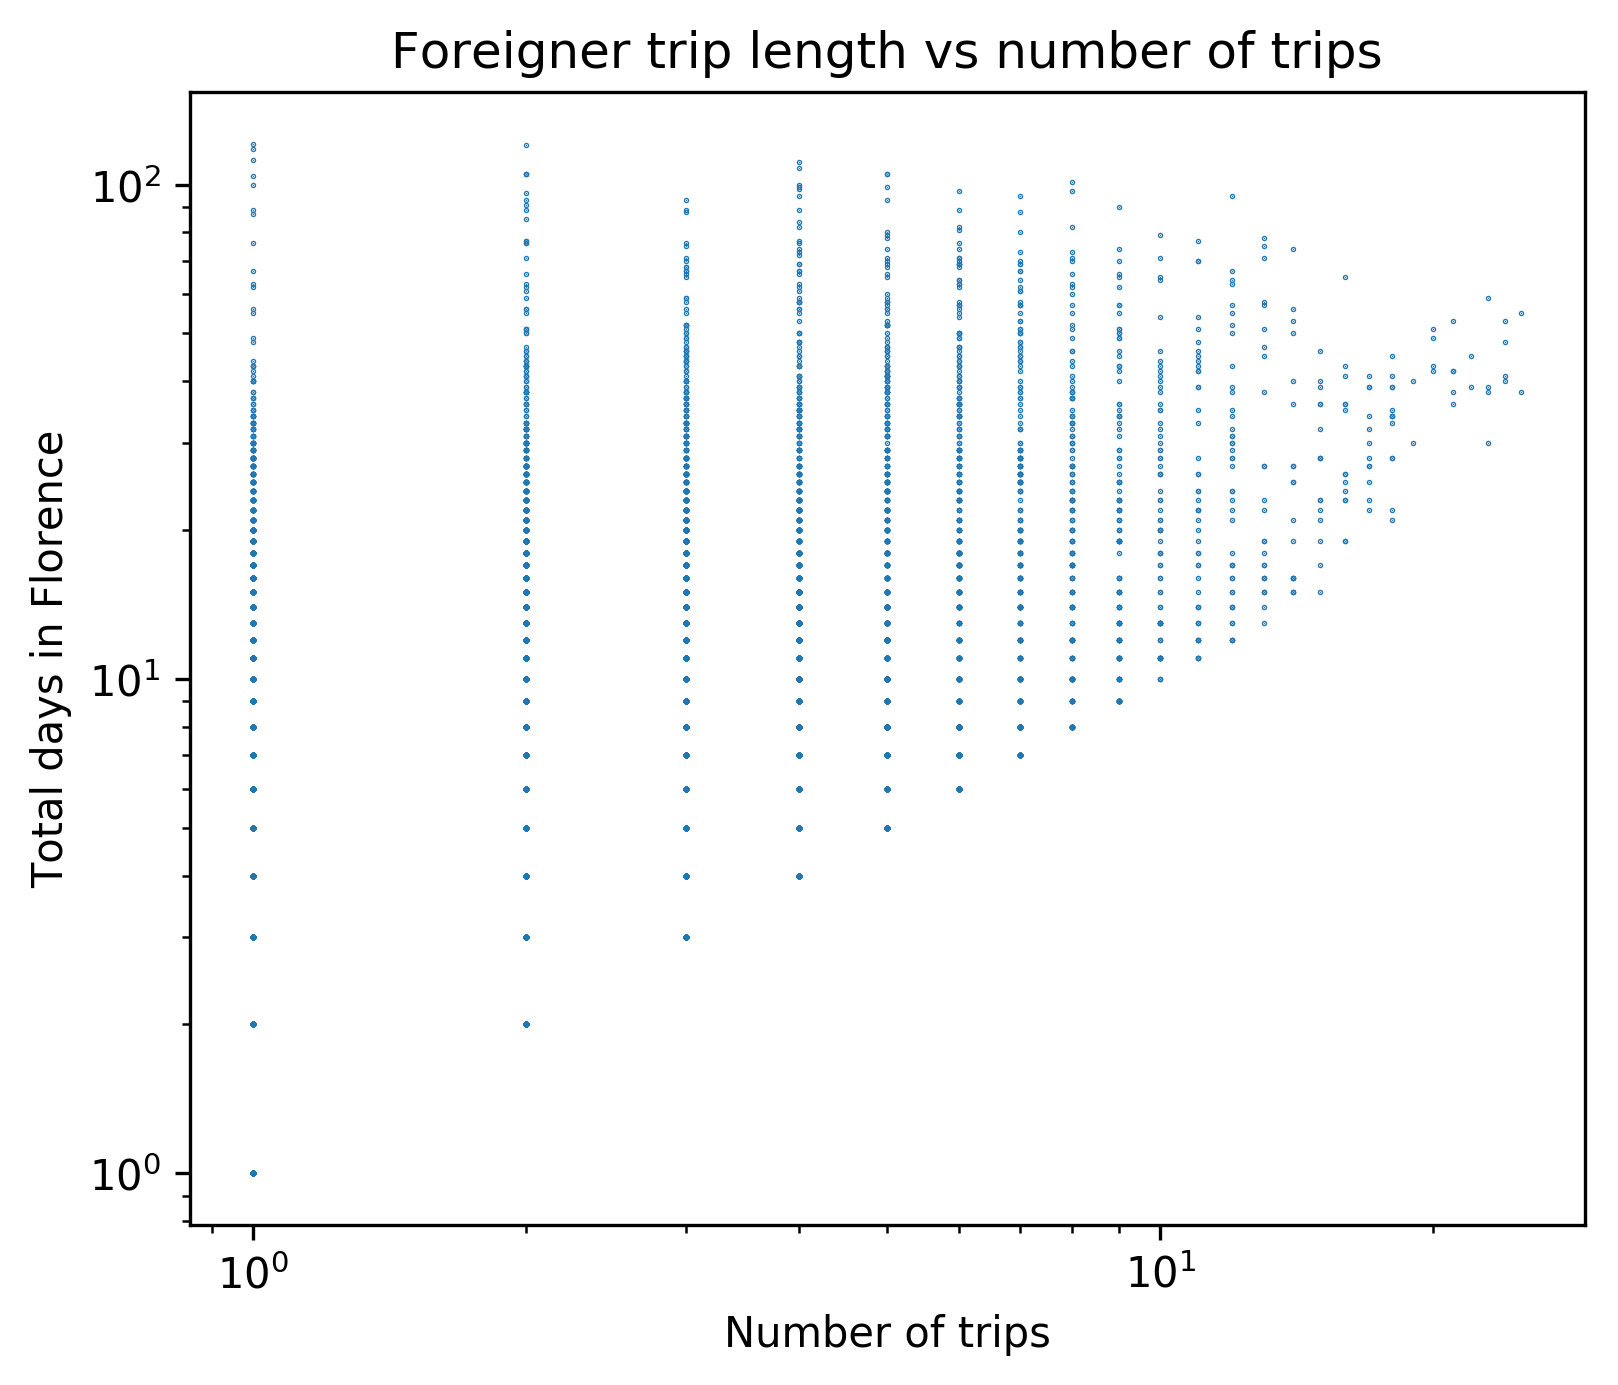

In [32]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfg.groupby('cust_id').count(),y=dfg.groupby('cust_id').sum(),s=.1)
plt.yscale('log')
plt.xscale('log')
ax.set_title('Foreigner trip length vs number of trips')
ax.set_xlabel('Number of trips')
ax.set_ylabel('Total days in Florence')
plt.show()

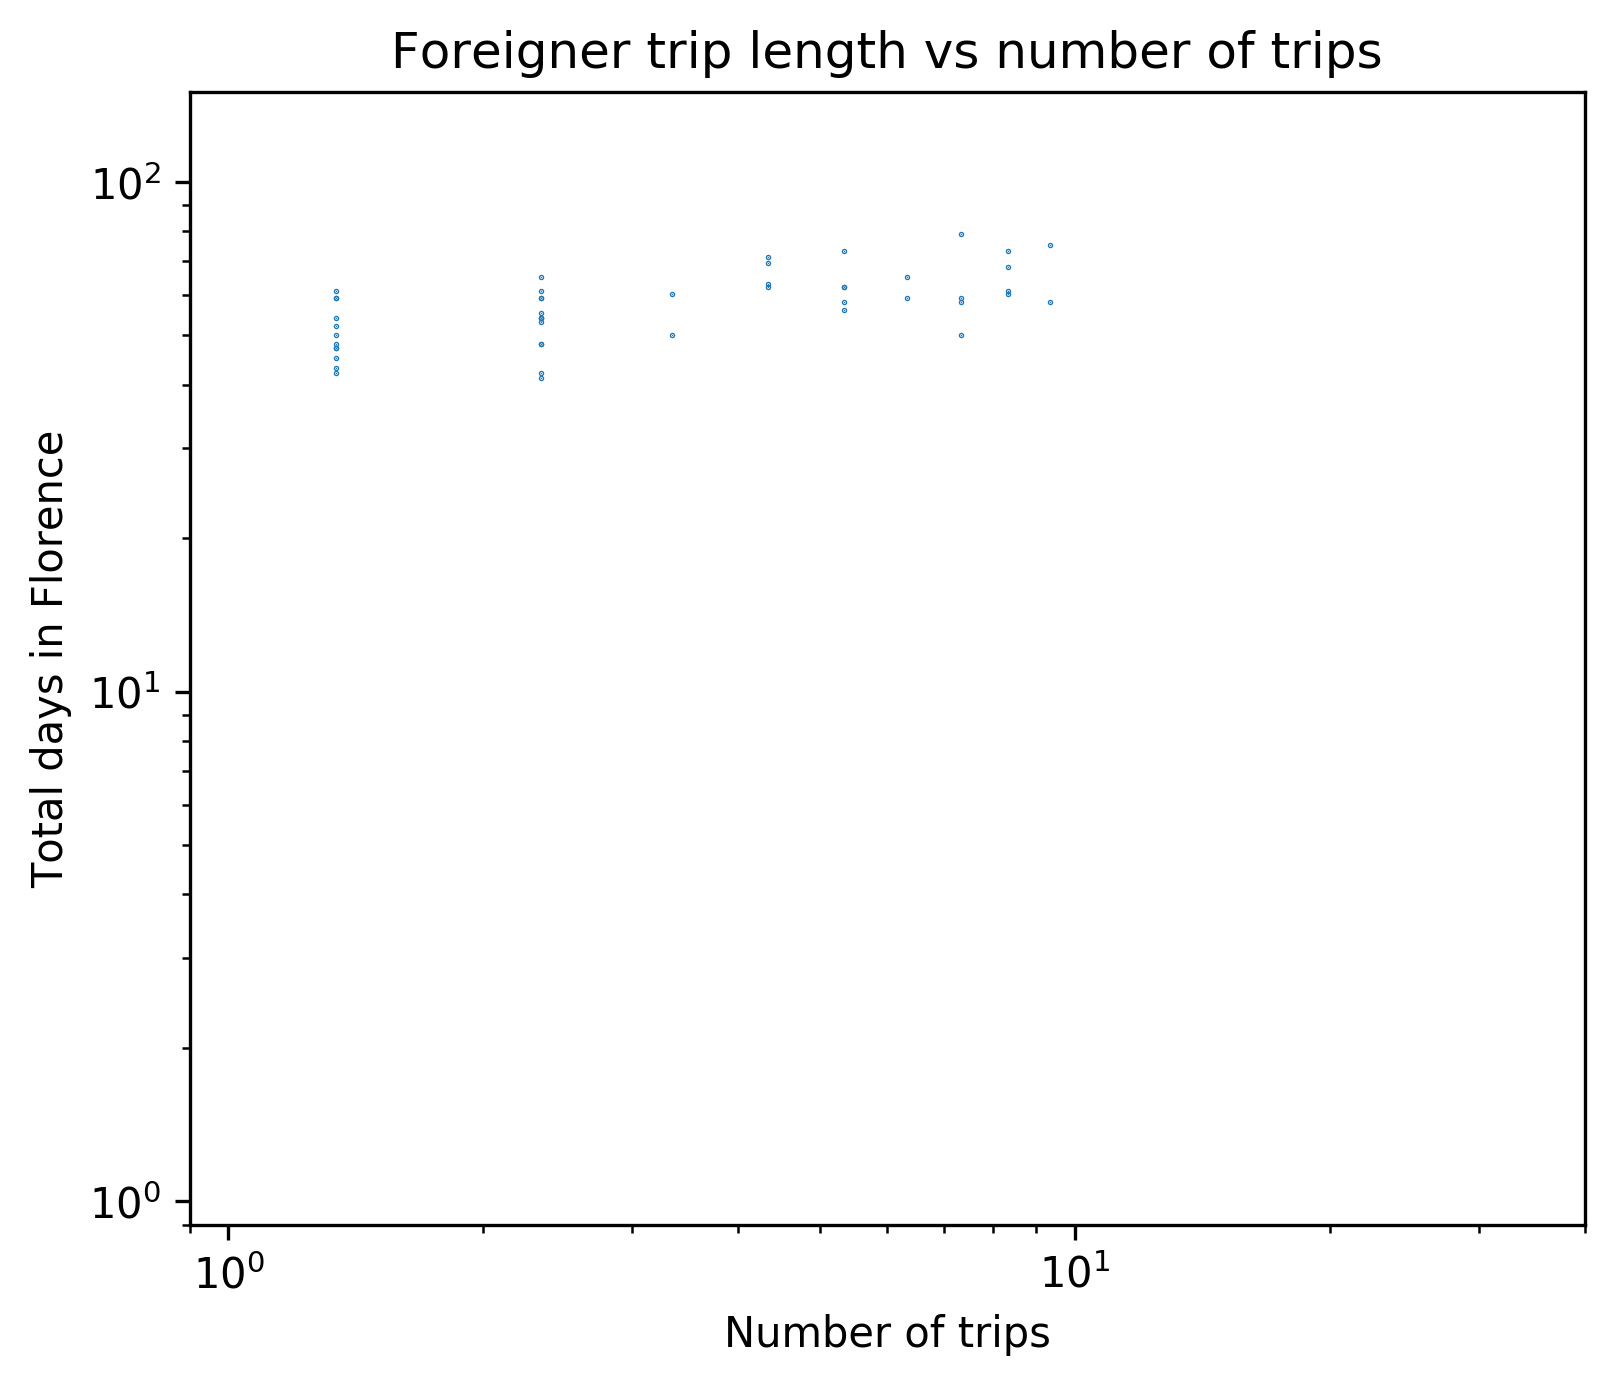

In [33]:
x = dfg.groupby('cust_id').count() + np.random.normal(loc=0,scale=25)
y = dfg.groupby('cust_id').sum() + np.random.normal(loc=0,scale=25)
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=x,y=y,s=.1)
plt.yscale('log')
plt.xscale('log')
plt.xlim([.9,40])
plt.ylim([.9,150])
ax.set_title('Foreigner trip length vs number of trips')
ax.set_xlabel('Number of trips')
ax.set_ylabel('Total days in Florence')
plt.show()

In [49]:
dfi['calls_out_fl_city'] = dfi['calls'] - dfi['calls_in_fl_city']
dfi['in_fl_city'] = dfi['calls_in_fl_city']>0
dfi['out_fl_city'] = dfi['calls_out_fl_city']>0
dfi['was_in_fl_city'] = dfi['in_fl_city'].shift(1)
dfi['was_out_fl_city'] = dfi['out_fl_city'].shift(1)
dfi['willbe_in_fl_city'] = dfi['in_fl_city'].shift(-1)
dfi['willbe_out_fl_city'] = dfi['out_fl_city'].shift(-1)

In [51]:
dfi.loc[dfi['same_cust']==False,'was_in_fl_city'] = None
dfi.loc[dfi['same_cust']==False,'was_out_fl_city'] = None
dfi['trip'] = ''

In [52]:
dfi.loc[(dfi['same_cust']==True)&(dfi['datediff']<3)&(dfi['was_in_fl_city']==False)&(dfi['in_fl_city']==True),'trip'] = 'start'
dfi.loc[(dfi['same_cust']==True)&(dfi['datediff']<3)&(dfi['was_in_fl_city']==True)&(dfi['in_fl_city']==True),'trip'] = 'continue'
dfi.loc[(dfi['same_cust']==True)&(dfi['datediff']<3)&(dfi['was_in_fl_city']==True)&(dfi['in_fl_city']==True)&(dfi['willbe_in_fl_city']==False),'trip'] = 'end'
dfi.loc[(dfi['same_cust']==False)&((dfi['in_fl_city']==True)|(dfi['calls_near_airport']>0)),'trip'] = 'first'
dfi2 = dfi[['cust_id','same_cust','date_','datediff','calls_in_fl_city','calls_out_fl_city','trip','on_trip']]
dfi2['trip_id'] = (((dfi2['on_trip'].shift(1) != dfi2['on_trip']).astype(int).cumsum())*(dfi2['on_trip']).astype(int))
dfig = df2[df2['trip_id']!=0][['cust_id','trip_id']].groupby(['cust_id','trip_id']).size().to_frame()

fri_trips = frequency(dfig.groupby('cust_id').count(),0) # Distribution of lengths of gaps between trips
fri_trlen = frequency(dfig,0) # Distribution of lengths of gaps between trips
fri_dtdff = frequency(dfi[dfi['datediff']>0],'datediff') # Distribution of lengths of gaps between trips

KeyError: "['on_trip'] not in index"

In [ ]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(fri_dtdff['datediff'],fri_dtdff['frequency'], linestyle='steps--')
plt.yscale('log')
plt.xscale('log')
ax.set_title('Length of gaps between trups to Florence by Italian customers')
ax.set_ylabel('Number of trips with gap of length x')
ax.set_xlabel('Gaps of trip')
plt.show()